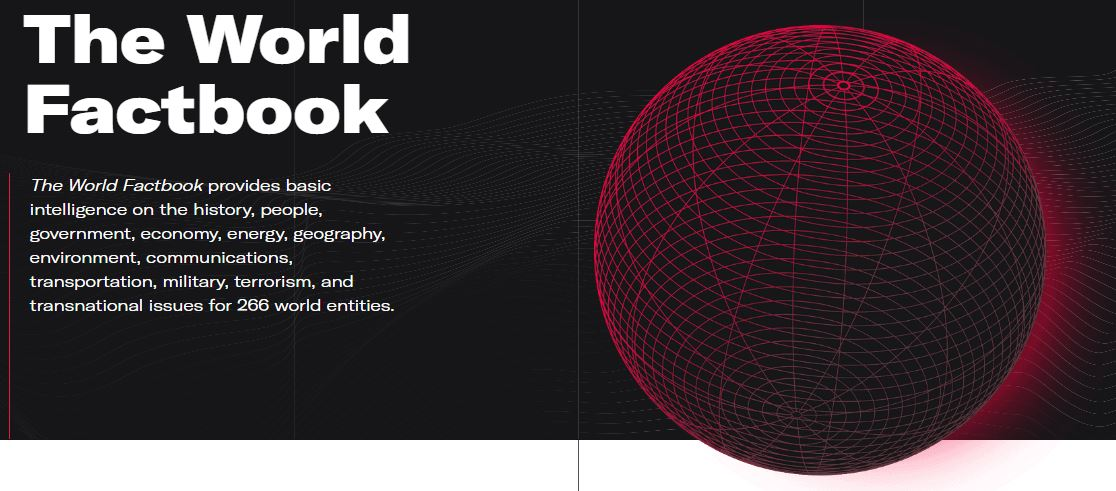

## Analyzing CIA Factbook Data: 

In this project I will be analyzing a database from CIA Factbook. This database includes information on over 200 countries. I will be using Sql lite to do the analysis on this project. 

In [4]:
%reload_ext sql
%sql sqlite:///factbook.db

'Connected: @factbook.db'

### Exploring the database: 

In [3]:
%%sql
SELECT *
  FROM sqlite_master
 WHERE type='table';

Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


In [4]:
%%sql

SELECT * 
  FROM facts
 LIMIT 5;

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Here is the descriptions for the columns:

Column Name | Description 
:-----------|:------------
code | abreviated name of the country
name | the name of the country.
area | the country's total area (both land and water).
area_land | the country's land area in square kilometers.
area_water | the country's water area in square kilometers.
population | the country's population.
population_growth | the country's population growth as a percentage.
birth_rate | the country's birth rate, or the number of births per year per 1,000 people.
death_rate | the country's death rate, or the number of death per year per 1,000 people.
migration_rate | the amount of people immigrating into and out of the country. 




### Summary of population statistics: 

In [5]:
%%sql

SELECT MIN(population), 
       MAX(population),
       MIN(population_growth),
       MAX(population_growth)
  FROM facts;

Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,7256490011,0.0,4.02


### Exploring Outliers: 

As we can see above there is a country with a population of 0 and a max population of 7.2 billion. Lets see what is throwing off these population figures. 

In [6]:
%%sql

SELECT * 
  FROM facts
 WHERE population == (SELECT MIN(population)
                        FROM facts);

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [7]:
%%sql

SELECT * 
  FROM facts
 WHERE population == (SELECT MAX(population)
                        FROM facts);

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


##### Note: 

As we can see above there is a row for Antartica and the World that is throwing off the values. Lets remove the world information and see how it impacts the results. Antartica will be left in since there are people that actually live there all year round. 

Here is a snippet from the CIA factbook website. 

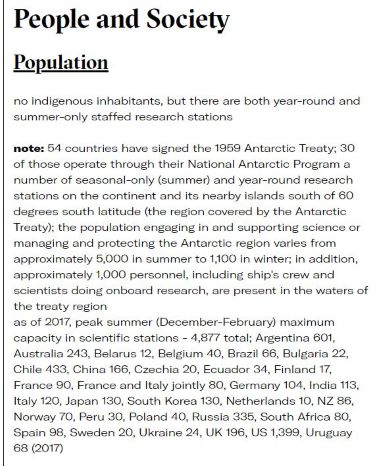

In [8]:
%%sql

SELECT MIN(population), 
       MAX(population),
       MIN(population_growth),
       MAX(population_growth)
  FROM facts
 WHERE name <> 'World';

Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,1367485388,0.0,4.02


### Average population and Area:

In [9]:
%%sql

SELECT AVG(population), AVG(area)
  FROM facts
  WHERE name <> 'World';

Done.


AVG(population),AVG(area)
32242666.56846473,555093.546184739


### Above average population and below average area: 

In [45]:
%%sql

SELECT *
  FROM facts
 WHERE population > (SELECT AVG(population) 
                       FROM facts 
                      WHERE name <> 'World' )
   AND area < (SELECT AVG(area) 
                 FROM facts 
                WHERE name <> 'World')

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
80,iz,Iraq,438317,437367,950,37056169,2.93,31.45,3.77,1.62
83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.1
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
91,ks,"Korea, South",99720,96920,2800,49115196,0.14,8.19,6.75,0.0
120,mo,Morocco,446550,446300,250,33322699,1.0,18.2,4.81,3.36
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
139,pl,Poland,312685,304255,8430,38562189,0.09,9.74,10.19,0.46
163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


Above we can see that Bangladesh and Germany are the top 2 countries with large populations compared to land size. 
Lets see what countries have large populations and land area ratio. 

### Countries with higher population/area ratio. 

In [50]:
%%sql

SELECT name, ROUND(CAST(population as FLOAT) / area,2) AS pop_area_ratio
  FROM facts
 ORDER BY pop_area_ratio DESC
 LIMIT 15;

Done.


name,pop_area_ratio
Macau,21168.96
Monaco,15267.5
Singapore,8141.28
Hong Kong,6445.04
Gaza Strip,5191.82
Gibraltar,4876.33
Bahrain,1771.86
Maldives,1319.64
Malta,1310.02
Bermuda,1299.93


These countries have a very high population compared to area. As I can see it seems like Bangladesh is the only country to be on the list that has a higher average population and being below average area.

### Top 2 countries with the largest populations: 

China and India clearly have the largest populations.

In [51]:
%%sql

SELECT *
  FROM facts
 WHERE population > (SELECT AVG(population) 
                       FROM facts 
                      WHERE name <> 'World' )
ORDER BY population desc
LIMIT 3; 

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None
37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44
77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04


### Top 3 countries with the highest growth rates. 

In [17]:
%%sql

SELECT *
  FROM facts
 WHERE population_growth > (SELECT AVG(population_growth) 
                              FROM facts 
                             WHERE name <> 'World' )
ORDER BY population_growth desc
LIMIT 3; 

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
162,od,South Sudan,644329,None,None,12042910,4.02,36.91,8.18,11.47
106,mi,Malawi,118484,94080,24404,17964697,3.32,41.56,8.41,0.0
29,by,Burundi,27830,25680,2150,10742276,3.28,42.01,9.27,0.0


### Countries with more water than land

In [14]:
%%sql

SELECT *
  FROM facts
 WHERE area_water > area_land
ORDER BY area_water desc
LIMIT 5; 

Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
228,io,British Indian Ocean Territory,54400,60,54340,None,None,None,None,None
247,vq,Virgin Islands,1910,346,1564,103574,0.59,10.31,8.54,7.67


Only two places have more water than land. One being the British Territory and the second the Virgin Islands. 

### Countries with higher water ratios to land. 

In [20]:
%%sql

SELECT name,CAST(area_water as FLOAT) /area_land AS water_land_ratio
  FROM facts
ORDER BY water_land_ratio desc
LIMIT 10; 

Done.


name,water_land_ratio
British Indian Ocean Territory,905.6666666666666
Virgin Islands,4.520231213872832
Puerto Rico,0.5547914317925592
"Bahamas, The",0.3866133866133866
Guinea-Bissau,0.2846728307254623
Malawi,0.25939625850340137
Netherlands,0.22571032366565366
Uganda,0.22292237442922375
Eritrea,0.16435643564356436
Liberia,0.15623961794019933


### Countries that will add the most people. 

In [44]:
%%sql

SELECT name, ROUND(birth_rate + migration_rate - death_rate,2) AS growth_rate
  FROM facts
 ORDER BY growth_rate desc
 LIMIT 20; 

Done.


name,growth_rate
South Sudan,40.2
American Samoa,39.27
Syria,37.96
"Micronesia, Federated States of",37.24
Tonga,35.99
Sao Tome and Principe,35.62
Somalia,35.32
Jordan,34.82
Mali,34.36
Uganda,33.84


### Countries with a higher death rate than birth rate as a ratio. 
Anything over 1 means there are more death than births. 

In [43]:
%%sql

SELECT name, ROUND(death_rate / birth_rate, 2) AS death_birth_ratio
  FROM facts
  WHERE death_birth_ratio > 1
 ORDER BY death_birth_ratio desc;
 

Done.


name,death_birth_ratio
Bulgaria,1.62
Serbia,1.5
Latvia,1.43
Lithuania,1.41
Hungary,1.39
Monaco,1.39
Germany,1.35
Slovenia,1.35
Ukraine,1.35
Saint Pierre and Miquelon,1.31


### Conclusion: 

This concludes the exploration of the factbook database from the CIA. As we can see there is alot of interesting information that can be gathered from the database. This project was a simple exploratory project to get comfortable using SQL Lite. 